In [12]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
train_data=pd.read_csv("../input/credit-risk/Training Data.csv")
test_data=pd.read_csv("../input/credit-risk/Test Data.csv")


train_data


,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [14]:
train_data["profession"]=pd.factorize(train_data.profession)[0]
train_data["city"]=pd.factorize(train_data.city)[0]
train_data["state"]=pd.factorize(train_data.state)[0]
train_data["married"]=pd.factorize(train_data.married)[0]
train_data["house_ownership"]=pd.factorize(train_data.house_ownership)[0]
train_data["car_ownership"]=pd.factorize(train_data.car_ownership)[0]

In [15]:
test_data["profession"]=pd.factorize(test_data.profession)[0]
test_data["city"]=pd.factorize(test_data.city)[0]
test_data["state"]=pd.factorize(test_data.state)[0]
test_data["married"]=pd.factorize(test_data.married)[0]
test_data["house_ownership"]=pd.factorize(test_data.house_ownership)[0]
test_data["car_ownership"]=pd.factorize(test_data.car_ownership)[0]

In [16]:

print(train_data["profession"][0])
type(train_data["profession"][0])

0


numpy.int64

In [17]:
xtrain=train_data.drop(columns=["risk_flag","state","city","profession"],axis=1)
ytrain=train_data["risk_flag"]
xtest=test_data.drop(columns=["state","city","profession"],axis=1)


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'experience'}>],
       [<AxesSubplot:title={'center':'married'}>,
        <AxesSubplot:title={'center':'house_ownership'}>,
        <AxesSubplot:title={'center':'car_ownership'}>,
        <AxesSubplot:title={'center':'profession'}>],
       [<AxesSubplot:title={'center':'city'}>,
        <AxesSubplot:title={'center':'state'}>,
        <AxesSubplot:title={'center':'current_job_years'}>,
        <AxesSubplot:title={'center':'current_house_years'}>],
       [<AxesSubplot:title={'center':'risk_flag'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

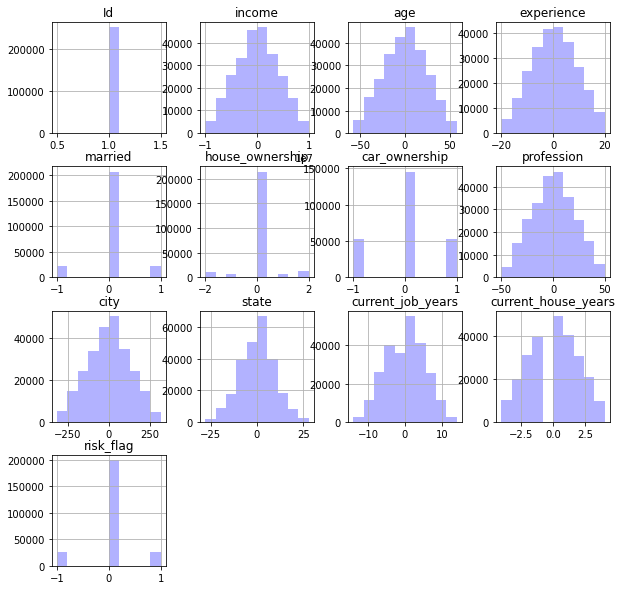

In [18]:
train_data.diff().hist(color="b",alpha=.3,figsize=(10,10))

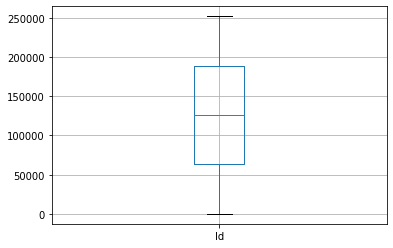

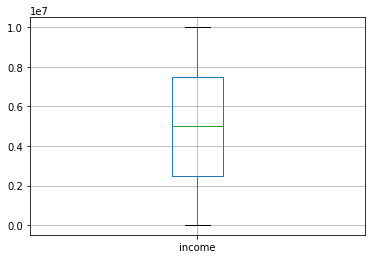

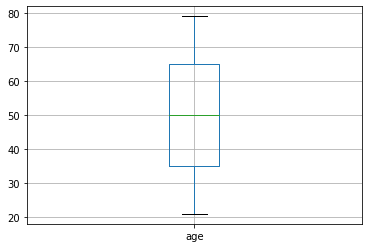

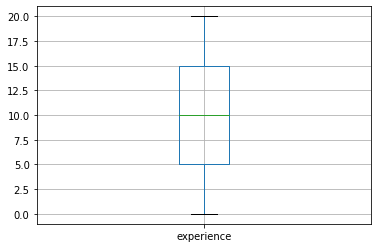

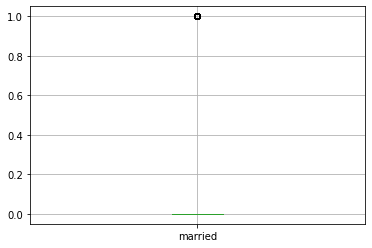

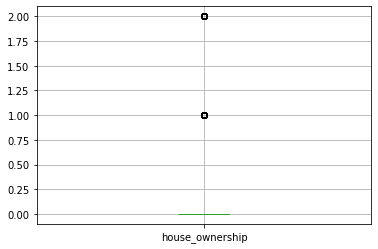

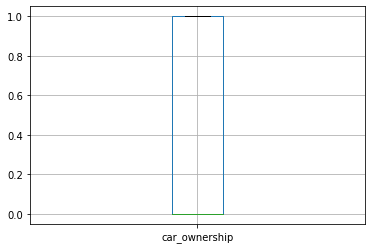

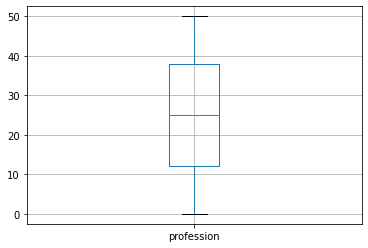

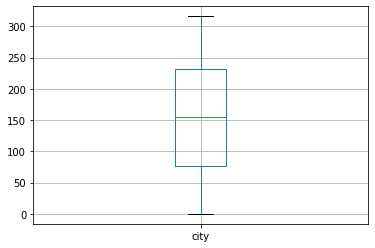

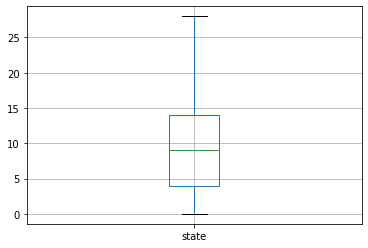

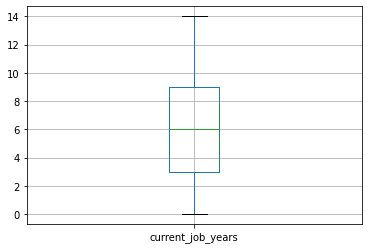

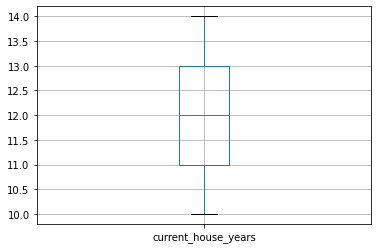

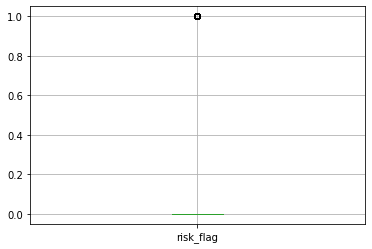

In [19]:
for column in train_data:
    plt.figure()
    train_data.boxplot([column])

In [20]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
y_pred=DTClassifier.predict(xtest)
pr=pd.DataFrame(y_pred,index=[test_data["id"]],columns=["risk_flag"])
pr.to_csv("predicition.csv")

ValueError: X has 12 features, but DecisionTreeClassifier is expecting 9 features as input.